<a href="https://colab.research.google.com/github/rufaiaishat/Financial-Inclusion-Data/blob/main/Financial_Inclusion_Nigeria_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Financial Inclusion in Nigeria

####Exploratory Data Analysis

In [ ]:
#Financial Inclusion in Nigeria
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#import file from laptop
from google.colab import files
uploaded = files.upload()

Saving micro_nga.csv to micro_nga.csv


In [ ]:
#read csv file into dataframe
df = pd.read_csv('micro_nga.csv')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 120 entries, economy to merchantpay_dig
dtypes: float64(73), int64(45), object(2)
memory usage: 937.6+ KB


In [ ]:
df.head()

,economy,economycode,wpid_random,wgt,female,age,educ,inc_q,emp_in,urbanicity_f2f,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig
0,Nigeria,NGA,182358305,0.812816,1,20.0,2,1,1,1,...,4,4,4,4,4,5,1,2,0,0
1,Nigeria,NGA,189983300,0.777928,2,50.0,2,4,1,2,...,1,4,4,4,1,1,1,1,1,0
2,Nigeria,NGA,134173456,1.338439,1,23.0,2,4,1,2,...,4,4,4,4,4,5,2,2,0,0
3,Nigeria,NGA,133272511,0.463378,2,27.0,2,5,1,2,...,1,4,4,4,2,1,1,1,1,1
4,Nigeria,NGA,195787893,2.649132,1,19.0,1,4,2,1,...,4,4,4,4,4,5,2,2,0,0


###**Exploratory Data Anaalysis - for People with no bank and mobile account**

In this section, we will explore the age,region, education level of individuals
without a bank or mobile account. Also, we will analyze their financial transactions, savings, credits habits, and payment receipts. We will assess their ability to access job opportunities and other economic opportunities.

In [ ]:
#Analyse based on people who do not have an account
mask = df['account'] == 0
df_noaccount = df[mask]



In [ ]:
df_noaccount.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381 entries, 2 to 997
Columns: 120 entries, economy to merchantpay_dig
dtypes: float64(73), int64(45), object(2)
memory usage: 360.2+ KB


In [ ]:
#Check If people with no account have mobile account
df_noaccount['account_mob'].tail(10)

,account_mob
957,0
961,0
969,0
971,0
988,0
991,0
993,0
994,0
996,0
997,0


In [ ]:
#group Age range of preople with no account using barchart
age_noact = df_noaccount['age']
age_noact.value_counts()
#group into age range

,count
age,
30.0,29
25.0,28
20.0,26
15.0,20
22.0,19
40.0,19
19.0,19
18.0,17
23.0,13


In [ ]:
#Group the age of  people with no account into Age Range

# Define age group bins and labels using range format
bins = [15, 17, 24, 34, 44, 54, 64, 74, 84, float('inf')]
labels = ['15-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84','84+']

# Apply age group categorization
df_noaccount['age_group'] = pd.cut(df_noaccount['age'], bins=bins, labels=labels, right=True)

# Optional: View the count in each age group
print(df_noaccount['age_group'].value_counts().sort_index())


age_group
15-17     20
18-24    113
25-34    120
35-44     66
45-54     24
55-64      8
65-74      7
75-84      0
84+        2
Name: count, dtype: int64


<ipython-input-10-6a5907770b75>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noaccount['age_group'] = pd.cut(df_noaccount['age'], bins=bins, labels=labels, right=True)


In [ ]:
#Count of Age Group with Mobile or Bank Account
age_noact = df_noaccount['age_group']
age_noact_vc = age_noact.value_counts()
age_noact_vc.head()

,count
age_group,
25-34,120
18-24,113
35-44,66
45-54,24
15-17,20


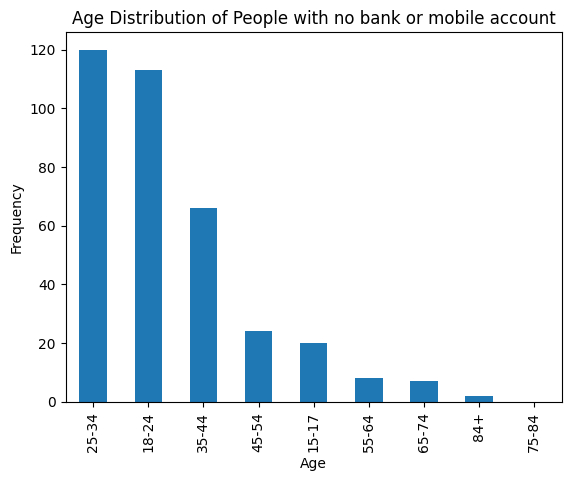

In [ ]:
#Plot barchart for the age distribution of people with no Bank Account
age_noact_vc.plot(
    kind ="bar",
    xlabel="Age",
    ylabel="Frequency",
    title ="Age Distribution of People with no bank or mobile account",
);



In [ ]:
#Group no account by region -urban/rural
df_noaccount['urbanicity_f2f'].value_counts()

,count
urbanicity_f2f,
2,202
1,179


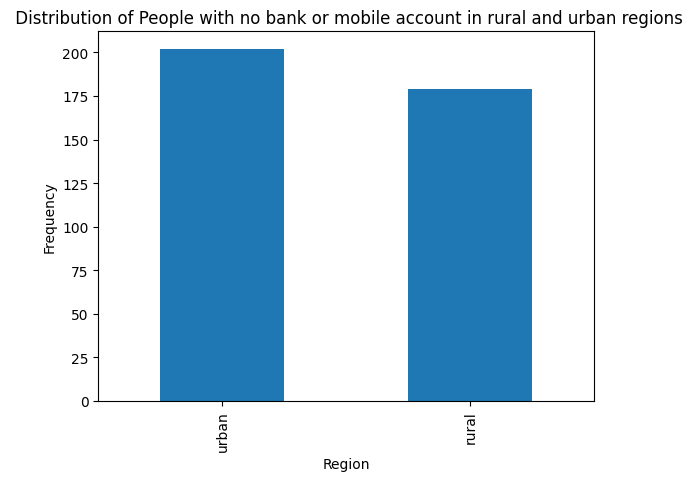

In [ ]:
#Group no account by region -urban/rural
urban_dict = {
    1: "rural",
    2: "urban"
              }
urban_vc = df_noaccount['urbanicity_f2f'].replace(urban_dict).value_counts()
urban_vc.plot(
    kind ="bar",
    xlabel="Region",
    ylabel="Frequency",
    title =" Distribution of People with no bank or mobile account in rural and urban regions",
);

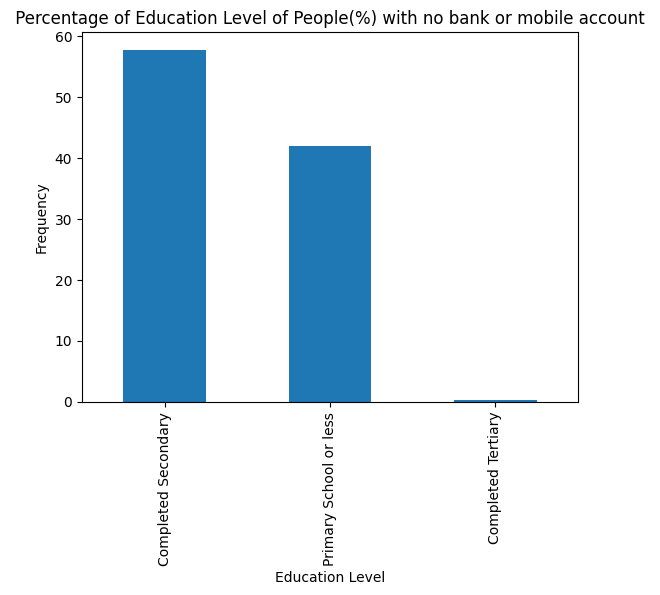

In [ ]:
#Group no account by education
educ_dict = {
    1: "Primary School or less",
    2: "Completed Secondary",
    3: "Completed Tertiary"
              }
educ_vc = (df_noaccount['educ'].replace(educ_dict).value_counts(normalize=True))*100
educ_vc.plot(
    kind ="bar",
    xlabel="Education Level",
    ylabel="Frequency",
    title =" Percentage of Education Level of People(%) with no bank or mobile account ",
);

In [ ]:
#Distribution of People with no bank account and their employment status

employed = {
    1: "in the workforce",
    2: "out of the workforce"
}
employed_vc= df_noaccount['emp_in'].replace(employed).value_counts()
employed_vc.head()


,count
emp_in,
in the workforce,261
out of the workforce,120


In [ ]:
#Check if People with No Account receive agricultural payment
agrcpay_vc = {
    1: "Yes",
    2: "No",
    3: "Unknown"

}
agrcpay = df_noaccount['fin42'].replace(agrcpay_vc).value_counts()
agrcpay.head()

,count
fin42,
No,258
Yes,118
Unknown,5


In [ ]:
#Check Percentage of People with No Account that are into agricultural business(either by growing crops or raising a livestock)
agrcbus = {
    1: "Yes",
    2: "No",
    3: "Both"

}
agrcbus_vc = df_noaccount['fin42a'].replace(agrcbus).value_counts()
agrcbus_vc.head()

,count
fin42a,
Yes,100
No,10
Both,8


In [ ]:
#Distribution of People without account that saved within the past year
save = {
    1: "Yes",
    0: "No"
}
savings_vc= df_noaccount['saved'].replace(save).value_counts()
savings_vc.head()

,count
saved,
No,198
Yes,183


In [ ]:
#Distribution of People without account that borrowed within the past year
borrow = {
    1: "Yes",
    0: "No"
}
borrow_vc= df_noaccount['borrowed'].replace(borrow).value_counts()
borrow_vc.head()

,count
borrowed,
No,200
Yes,181


In [ ]:
#Distribution of People without account that receive wage payment
wage = {
    1: "receive payment into an Account",
    2: "receive payment in cash only",
    3: "receive payment using other methods",
    4: "did not recieve payment",
    5: "unknown"
}
wage_vc= df_noaccount['receive_wages'].replace(wage).value_counts()
wage_vc.head()

,count
receive_wages,
did not recieve payment,330
receive payment in cash only,47
receive payment using other methods,2
unknown,2


In [ ]:
#Receive a Government transfer payment

govt_tfr = {
    1: "receive payment into an Account",
    2: "receive payment in cash only",
    3: "receive payment using other methods",
    4: "did not recieve payment",
    5: "unknown"
}
govt_tfr_vc= df_noaccount['receive_transfers'].replace(govt_tfr).value_counts()
govt_tfr_vc.head()


,count
receive_transfers,
did not recieve payment,369
unknown,5
receive payment in cash only,4
receive payment using other methods,3


In [ ]:
#Received a government pension payment
govt_pen = {
    1: "receive payment into an Account",
    2: "receive payment in cash only",
    3: "receive payment using other methods",
    4: "did not recieve payment",
    5: "unknown"
}
govt_pen_vc= df_noaccount['receive_pension'].replace(govt_pen).value_counts()
govt_pen_vc.head()

,count
receive_pension,
did not recieve payment,377
unknown,3
receive payment using other methods,1


In [ ]:
#Received a payment for the sale of agricultural goods
agric_pay = {
    1: "receive payment into an Account",
    2: "receive payment in cash only",
    3: "receive payment using other methods",
    4: "did not recieve payment",
    5: "unknown"
}
agric_pay_vc= df_noaccount['receive_agriculture'].replace(agric_pay).value_counts()
agric_pay_vc.head()

,count
receive_agriculture,
did not recieve payment,258
receive payment in cash only,114
unknown,5
receive payment using other methods,4


In [ ]:
# Paid a utility bill

util_pay = {
    1: "made payment into an Account",
    2: "made payment in cash only",
    3: "made payment using other methods",
    4: "did not make payment",
    5: "unknown"
}
util_pay_vc= df_noaccount['pay_utilities'].replace(util_pay).value_counts()
util_pay_vc.head()

,count
pay_utilities,
did not make payment,308
made payment in cash only,62
made payment using other methods,6
unknown,5


In [ ]:
 #Made or received a domestic remittance payment
 dom_pay = {
    1: "sent/received payment through an Account",
    2: "sent/received payment through an otc transaction",
    3: "sent/received payment in cash only",
    4: "sent/received payment using other methods",
    5: "did not send/receive",
    6: "unknown"
}
dom_pay_vc= df_noaccount['remittances'].replace(dom_pay).value_counts()
dom_pay_vc.head()



,count
remittances,
did not send/receive,246
sent/received payment in cash only,76
sent/received payment through an Account,35
unknown,9
sent/received payment using other methods,8


In [ ]:
#Distribution of People with no bank account and their employment status

employed = {
    1: "in the workforce",
    2: "out of the workforce"
}
employed_vc= df_noaccount['emp_in'].replace(employed).value_counts()
employed_vc.head()


,count
emp_in,
in the workforce,261
out of the workforce,120


In [ ]:
#check for availability of phone

mobile = {
    1: "yes",
    2: "no",
    3: "ref"
}
mobile_vc= df_noaccount['mobileowner'].replace(mobile).value_counts()
mobile_vc.head()



,count
mobileowner,
yes,253
no,128


In [ ]:
#Distribution of People with internet access
internet = {
    1: "yes",
    2: "no",
    3: "unknown",
    4: "ref"
}
internet_vc= df_noaccount['internetaccess'].replace(internet).value_counts()
internet_vc.head()


,count
internetaccess,
no,317
yes,58
unknown,5
ref,1


###Exploratory Data Analysis of people with acccount

In [ ]:
#Analyse based on people who do not have an account
mask1 = df['account'] == 1
df_account = df[mask1]

##Exploratory Data Analysis to compare Education Levels Between People with Account and No Account

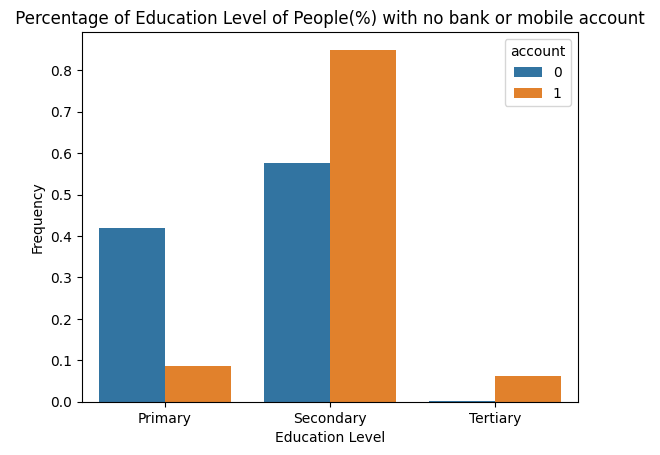

In [ ]:
#Group no account by education
educ_dict = {
    1: "Primary",#Completed Primary School or less
    2: "Secondary",#Completed Secondary School
    3: "Tertiary"#Completed Tertiary School
              }
#Create a dataframe for the education level
educ_df = (df['educ'].replace(educ_dict).groupby(df['account']).value_counts(normalize=True).rename("frequency").to_frame().reset_index())
sns.barplot(
    x = "educ",
    y ="frequency",
    data = educ_df,
    hue ="account",
    order=educ_dict.values())
plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.title(" Percentage of Education Level of People(%) with no bank or mobile account ");


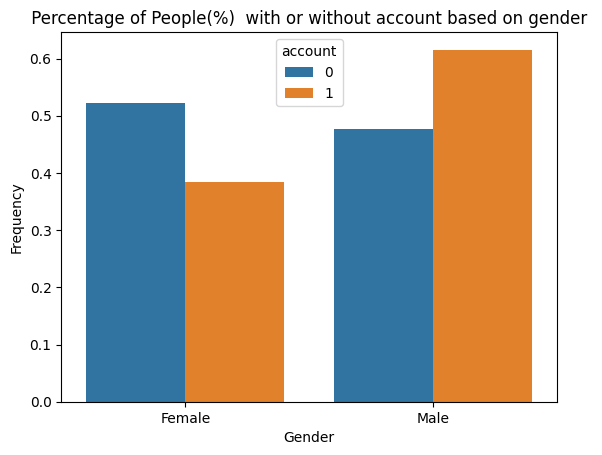

In [ ]:
#Check the number of people with or without account based on gender
gend_dict = {
    1: "Female",#Completed Primary School or less
    2: "Male",#Completed Secondary School

              }
#Create a dataframe for the education level
gend_df = (df['female'].replace(gend_dict).groupby(df['account']).value_counts(normalize=True).rename("frequency").to_frame().reset_index())
#Create a pictorial representation of people with or without account based on gender
sns.barplot(
    x = "female",
    y = "frequency",
    data = gend_df,
    hue ="account")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title(" Percentage of People(%)  with or without account based on gender ");


In [ ]:
#Creating a Dataframe for Gender
gend = {
    1: "Female",
    2: "Male"}
df['gender']= df['female'].replace(gend).to_frame()
df['gender'].head()

,gender
0,Female
1,Male
2,Female
3,Male
4,Female


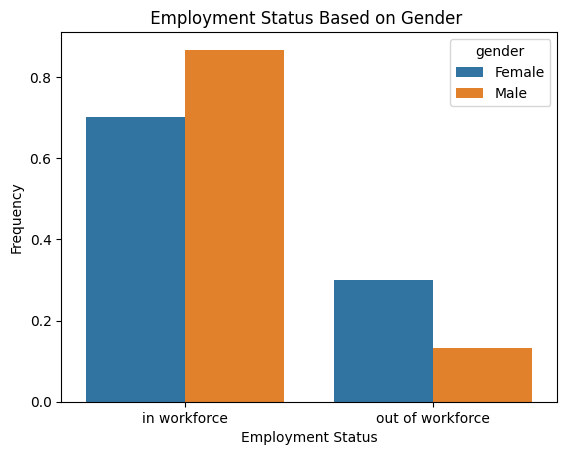

In [ ]:
#Distribution of People and their employment status

employed = {
    1: "in workforce",
    2: "out of workforce"
}


employed_df= (df['emp_in'].replace(employed).groupby(df['gender']).value_counts(normalize = True).rename('frequency').to_frame().reset_index())
employed_df.head()

#Employment Status Based on Gender

sns.barplot(
    x = "emp_in",
    y = "frequency",
    data = employed_df,
    hue ="gender")
plt.xlabel("Employment Status")
plt.ylabel("Frequency")
plt.title(" Employment Status Based on Gender  ");


#Create a pictorial representation of people with or without account





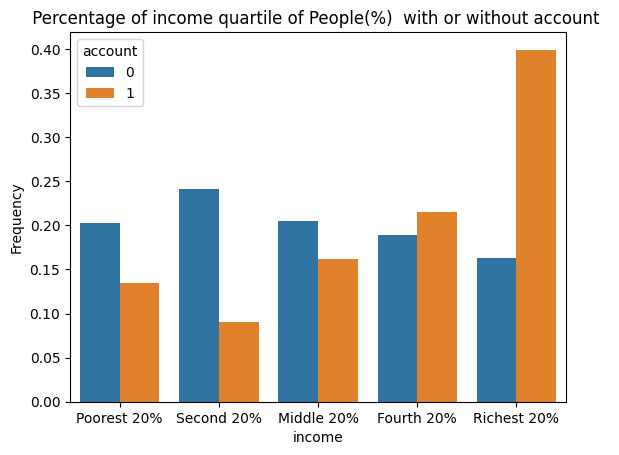

In [ ]:
#Income Quartile of People with and without account
inc_dict={
1: 'Poorest 20%',
2: 'Second 20%',
3: 'Middle 20%',
4: 'Fourth 20%' ,
5: 'Richest 20%' }
#Create a dataframe for the income quartile
inc_df = (df['inc_q'].replace(inc_dict).groupby(df['account']).value_counts(normalize=True).rename("frequency").to_frame().reset_index())
#Create a pictorial representation of people with or without account
sns.barplot(
    x = "inc_q",
    y = "frequency",
    data = inc_df,
    hue ="account",
    order=inc_dict.values())
plt.xlabel("income")
plt.ylabel("Frequency")
plt.title(" Percentage of income quartile of People(%)  with or without account  ");


In [ ]:
inc_df.head(10)

,account,inc_q,frequency
0,0,Second 20%,0.241470
1,0,Middle 20%,0.204724
2,0,Poorest 20%,0.202100
3,0,Fourth 20%,0.188976
4,0,Richest 20%,0.162730
5,1,Richest 20%,0.399031
6,1,Fourth 20%,0.214863
7,1,Middle 20%,0.161551
8,1,Poorest 20%,0.134087
9,1,Second 20%,0.090468


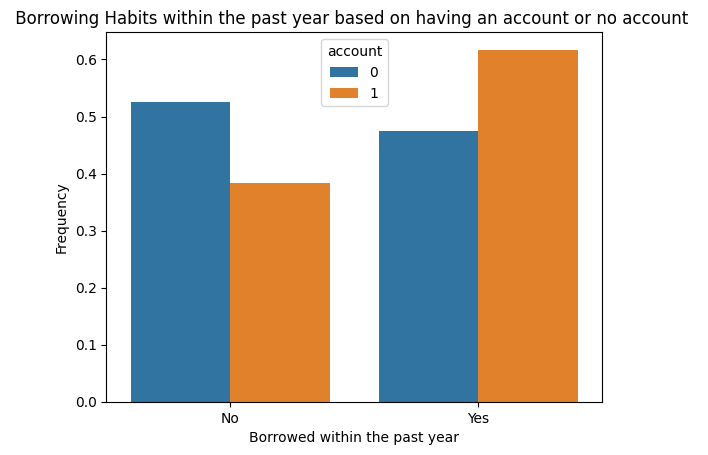

In [ ]:
#Check Savings and borrowing habits
#Borrowed Habits
bow_dict={
1: 'Yes',
0: 'No',
 }
#Create a dataframe for the income quartile
bow_df = (df['borrowed'].replace(bow_dict).groupby(df['account']).value_counts(normalize=True).rename("frequency").to_frame().reset_index())
#Create a pictorial representation of people with or without acco

sns.barplot(
    x = "borrowed",
    y = "frequency",
    data = bow_df,
    hue ="account"
    )
plt.xlabel("Borrowed within the past year")
plt.ylabel("Frequency")
plt.title(" Borrowing Habits within the past year based on having an account or no account  ");




In [ ]:
#Group the age of  people with no account into Age Range

# Define age group bins and labels using range format
bins = [15, 17, 24, 34, 44, 54, 64, 74, 84, float('inf')]
labels = ['15-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84','84+']

# Apply age group categorization
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Optional: View the count in each age group
print(df['age_group'].sort_index())


0      18-24
1      45-54
2      18-24
3      25-34
4      18-24
       ...  
995    25-34
996    18-24
997    18-24
998    18-24
999    25-34
Name: age_group, Length: 1000, dtype: category
Categories (9, object): ['15-17' < '18-24' < '25-34' < '35-44' ... '55-64' < '65-74' < '75-84' < '84+']


In [ ]:
# prompt: group age group into a dictionary and remove nan values, change the keys into values

# Assuming df_noaccount is already defined as in your provided code.

# Group by age_group, remove NaN values, and then swap keys and values
age_group_dict = df['age_group'].dropna().value_counts().to_dict()

# Swap keys and values, handling potential duplicate values by creating lists
swapped_dict = {}
for key, value in age_group_dict.items():
  if value not in swapped_dict:
    swapped_dict[value] = [key]  # Initialize with a list for the first occurrence
  else:
    swapped_dict[value].append(key)  # Add the key to the existing list

swapped_dict


{372: ['25-34'],
 237: ['18-24'],
 206: ['35-44'],
 81: ['45-54'],
 30: ['15-17'],
 27: ['55-64'],
 21: ['65-74'],
 2: ['84+'],
 1: ['75-84']}

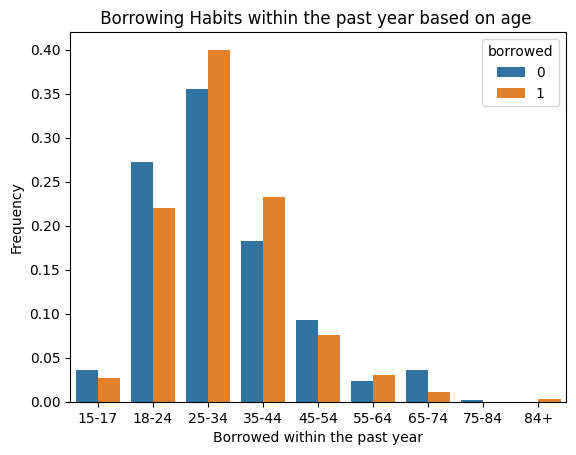

In [ ]:
#Borrowing Habits accross Age groups
bowage_df = (df['age_group'].replace(swapped_dict).groupby(df['borrowed']).value_counts(normalize=True).rename("frequency").to_frame().reset_index())

#Create a pictorial representation of people with or without acco

sns.barplot(
    x = "age_group",
    y = "frequency",
    data = bowage_df,
    hue = "borrowed",
    #order = age_group_counts
    )
plt.xlabel("Borrowed within the past year")
plt.ylabel("Frequency")
plt.title(" Borrowing Habits within the past year based on age  ");


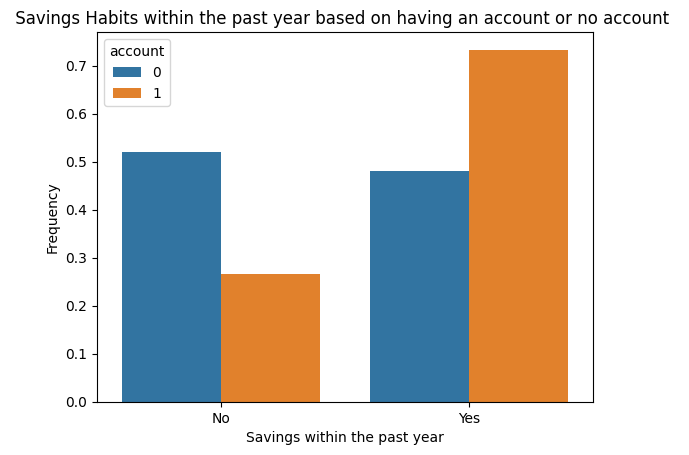

In [ ]:
#Explore Savings Habits
saved_dict={
1: 'Yes',
0: 'No',
 }
#Create a dataframe for the income quartile
saved_df = (df['saved'].replace(saved_dict).groupby(df['account']).value_counts(normalize=True).rename("frequency").to_frame().reset_index())
#Create a pictorial representation of people with or without account

sns.barplot(
    x = "saved",
    y = "frequency",
    data = saved_df,
    hue ="account"
    )
plt.xlabel("Savings within the past year")
plt.ylabel("Frequency")
plt.title(" Savings Habits within the past year based on having an account or no account  ");


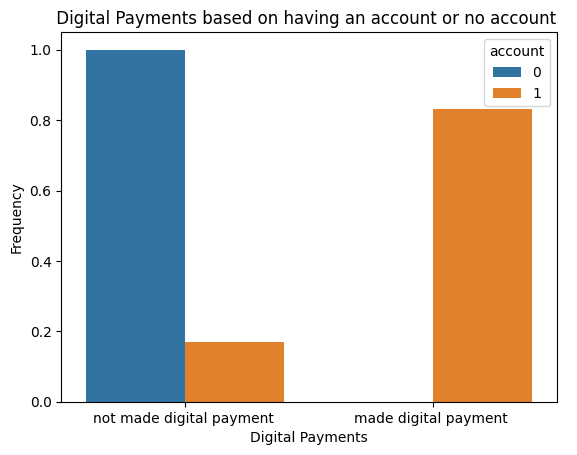

In [ ]:
#Digital Access and Mobile Transaction Trends
#Made or received digital payments
dig_pay = {
    1: "made digital payment ",
    0: "not made digital payment ",

}
dig_pay_df= (df['anydigpayment'].replace(dig_pay).groupby(df['account']).value_counts(normalize=True).rename("frequency").to_frame().reset_index())
#Create a pictorial representation of digital payments
sns.barplot(
    x = "anydigpayment",
    y = "frequency",
    data = dig_pay_df,
    hue ="account"
    )
plt.xlabel("Digital Payments")
plt.ylabel("Frequency")
plt.title(" Digital Payments based on having an account or no account  ");


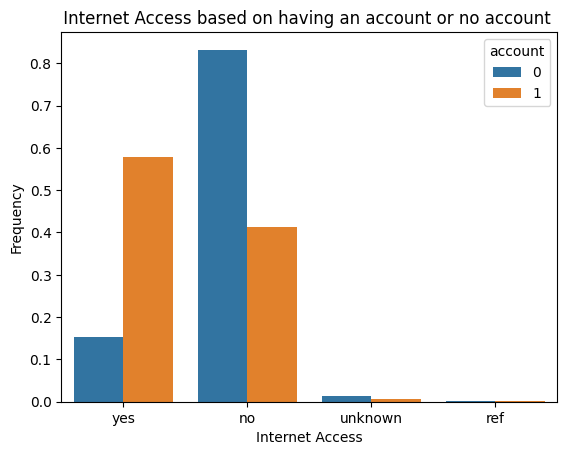

In [ ]:
#Distribution of People with internet access
internet = {
    1: "yes",
    2: "no",
    3: "unknown",
    4: "ref"
}
internet_df = df['internetaccess'].replace(internet).groupby(df['account']).value_counts(normalize =True).rename("frequency").to_frame().reset_index()
#Create a pictorial representation of internet access
sns.barplot(
    x = "internetaccess",
    y = "frequency",
    data = internet_df,
    hue ="account",
    order=internet.values())
plt.xlabel("Internet Access")
plt.ylabel("Frequency")
plt.title(" Internet Access based on having an account or no account  ");
#internet_vc.head()


In [ ]:
#check for availability of phone

mobile = {
    1: "yes",
    2: "no",
    3: "ref"
}
mobile_vc= df['mobileowner'].replace(mobile).value_counts()
mobile_vc.head()

,count
mobileowner,
yes,832
no,167
4,1


###Data Preparation

In this section, we will find clusters and/or patterns within the dataset
20 features were selected to determine the pattern within the dataset.


In [ ]:
#Import KMeans library
from sklearn.cluster import KMeans

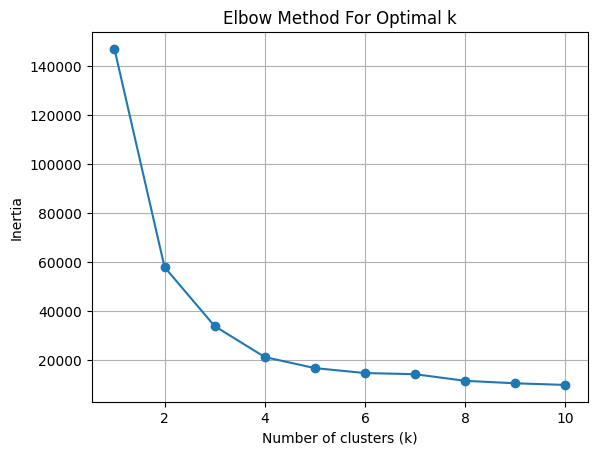

In [ ]:
#  combine 20 most useful column into a variable X

# List of the 20 most useful columns (replace with your actual column names)
useful_columns =['age', 'female', 'account','educ', 'emp_in', 'inc_q', 'mobileowner',
                 'internetaccess', 'saved', 'borrowed', 'anydigpayment', 'account_mob',
                 'urbanicity_f2f', 'fin42', 'receive_wages', 'receive_transfers',
                 'receive_agriculture','receive_pension','fin2', 'fin30']
#Check for missing values/rows
df[useful_columns].isna().sum()


#Create the feature matrix X
X = df[useful_columns].dropna()


#X = df[['age', 'mobileowner']].dropna()

# Create an empty list to store inertia values to check for the best k(number of clusters)
inertia = []

# Try different numbers of clusters (from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia vs. number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()



In [ ]:
# Create a KMeans model with 3 clusters since the bend in k above is at k =3
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit (train) the model
kmeans.fit(X)

# Add the cluster labels to your data
df_new = X.copy()
df_new['cluster'] = kmeans.labels_
# Group by cluster and take the mean
clustersummary = df_new.groupby('cluster').mean()

print(clustersummary)


               age    female   account      educ    emp_in     inc_q  \
cluster                                                                
0        36.138614  1.606436  0.673267  1.834158  1.126238  3.410891   
1        22.736948  1.518072  0.560241  1.863454  1.261044  3.285141   
2        57.597938  1.618557  0.701031  1.628866  1.257732  3.474227   

         mobileowner  internetaccess     saved  borrowed  anydigpayment  \
cluster                                                                   
0           1.128713        1.611386  0.690594  0.601485       0.561881   
1           1.198795        1.548193  0.602410  0.544177       0.465863   
2           1.195876        1.793814  0.587629  0.494845       0.567010   

         account_mob  urbanicity_f2f     fin42  receive_wages  \
cluster                                                         
0           0.160891        1.680693  1.841584       3.292079   
1           0.138554        1.642570  1.769076       3.367470   
2  

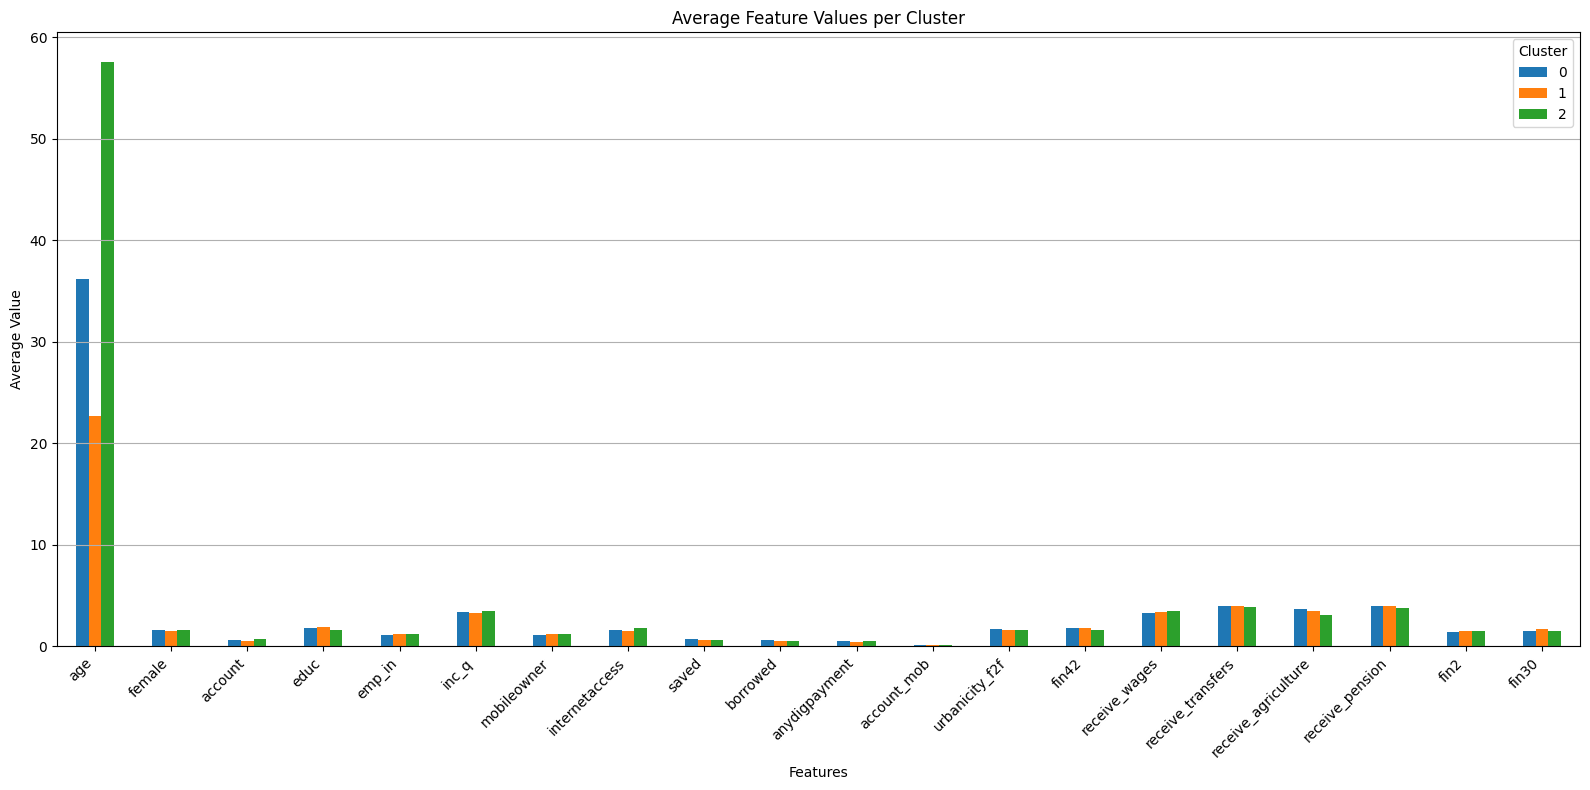

In [ ]:
#Cluster Summary in a Plot
import matplotlib.pyplot as plt



# 2. Transpose it so features are on the x-axis
clustersummary_Trans = clustersummary.T

# 3. Plot the bar chart
clustersummary_Trans.plot(kind='bar', figsize=(16,8))

# 4. Make it prettier
plt.title('Average Feature Values per Cluster')
plt.ylabel('Average Value')
plt.xlabel('Features')
plt.legend(title='Cluster')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# 5. Show the plot
plt.tight_layout()
plt.show()


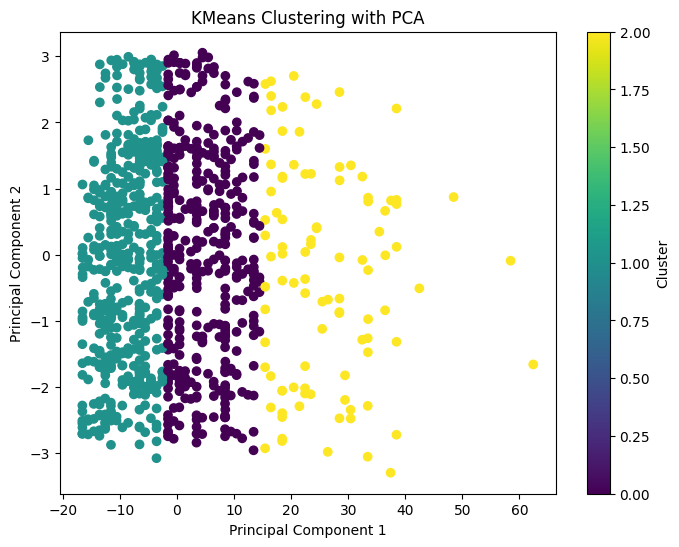

In [ ]:
from sklearn.decomposition import PCA

# Assuming 'X' and 'kmeans' are already defined as in your provided code.

# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the data points colored by cluster
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with PCA')
plt.colorbar(label='Cluster')
plt.show()



In [ ]:
# Plotting the clusters
'''plt.scatter(df_new['age'], df_new['mobileowner'], c=df_new['cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Mobile Owner (2=No, 1=Yes)')
plt.title('KMeans Clustering Example')
plt.show()'''


### Explainable AI (SHAP) for the K-means Cluster
In this section , we will use SHAP to understand how much each features contributed to the clusters.

In [ ]:
df_new['cluster'] = kmeans.labels_ #The number of clusters will be the output

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Select only the feature columns
X = df_new[useful_columns]
y = df_new['cluster']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
#Install and import SHAP
!pip install shap

import shap


In [ ]:
#Initialize SHAP Explainer
# Use TreeExplainer because we used Random Forest
explainer = shap.TreeExplainer(model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)


<Figure size 640x480 with 0 Axes>

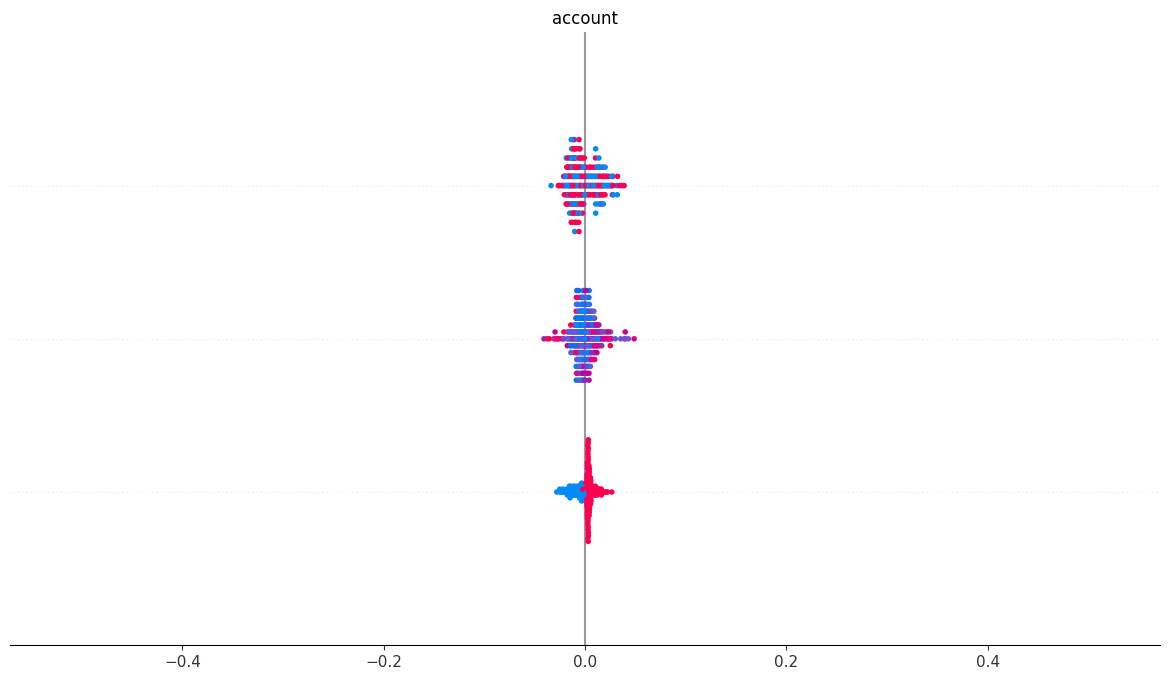

In [ ]:
#Plot SHAP
# For overall feature importance
shap.summary_plot(shap_values, X_test);


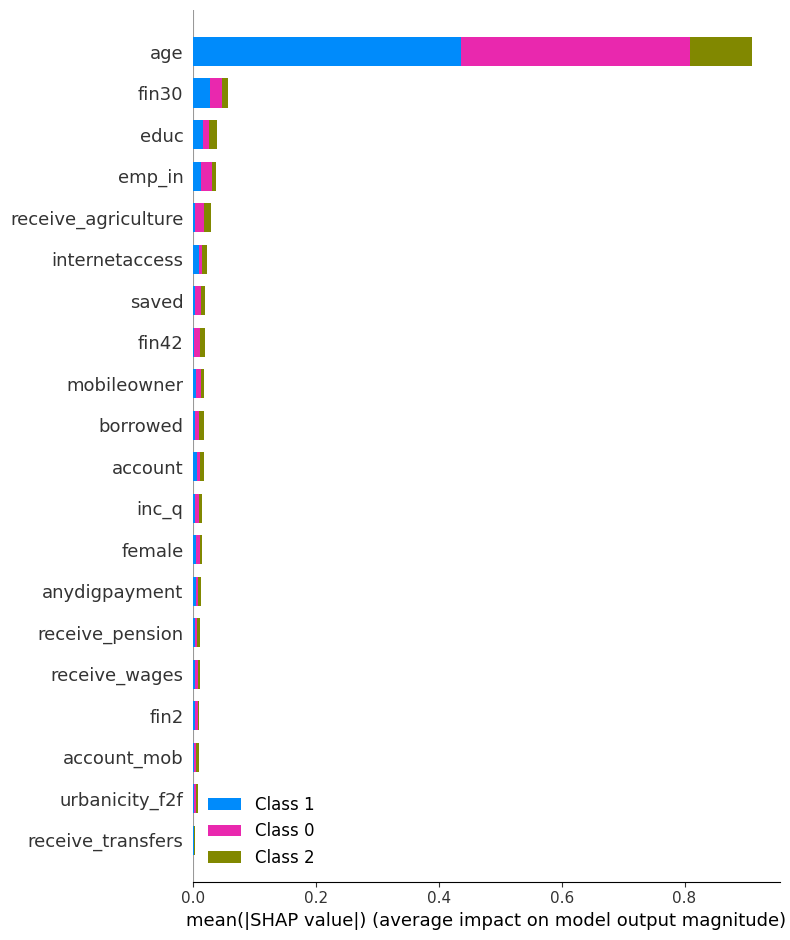

In [ ]:
#Check which features mostly cause people to be in cluster 1
# For a specific cluster, e.g., Cluster 0
shap.summary_plot(shap_values, X_test, plot_type="bar") # plot_type="bar" is added to improve visualization for multi-class problems